In [2]:
# Importing Relevant Packages 

import os
import sys
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import matplotlib as mpl
import warnings 
warnings.filterwarnings('ignore')
np.random.seed(42)

print("All packages imported!")


plt.style.use('bmh')

All packages imported!


In [4]:
# Reading csv files into dataframes

hpg_reserve = pd.read_csv(os.path.join(os.getcwd(),'Data', 'hpg_reserve.csv.gz'))
air_reserve = pd.read_csv(os.path.join(os.getcwd(),'Data', 'air_reserve.csv'))
store_id = pd.read_csv(os.path.join(os.getcwd(),'Data','store_id_relation.csv'))

# Merging the air and hpg reservations data to the store id to match each restaurant to their appropriate ID for each dataset
air_reserve_merged = pd.merge(air_reserve, store_id, on='air_store_id')
hpg_reserve_merged = pd.merge(hpg_reserve, store_id, on='hpg_store_id')

# Obtaining 2016 data from merged databases 
# and then finding the total number of visitors for each dataset

air_reserve_2016 = air_reserve_merged[air_reserve_merged["visit_datetime"].str.contains('2016-')]
air_visitors = air_reserve_2016["reserve_visitors"].sum()

hpg_reserve_2016 = hpg_reserve_merged[hpg_reserve_merged['visit_datetime'].str.contains('2016-')]
hpg_visitors = hpg_reserve_2016["reserve_visitors"].sum()

,air_store_id,hpg_store_id
0,air_63b13c56b7201bd9,hpg_4bc649e72e2a239a
1,air_a24bf50c3e90d583,hpg_c34b496d0305a809
2,air_c7f78b4f3cba33ff,hpg_cd8ae0d9bbd58ff9
3,air_947eb2cae4f3e8f2,hpg_de24ea49dc25d6b8
4,air_965b2e0cf4119003,hpg_653238a84804d8e7
...,...,...
145,air_b8925441167c3152,hpg_0cc0abae3a8b52de
146,air_f8233ad00755c35c,hpg_098e4dd30e54fee6
147,air_6607fe3671242ce3,hpg_1004356dc8ab69ec
148,air_ccd19a5bc5573ae5,hpg_df22bf146d2c7e19


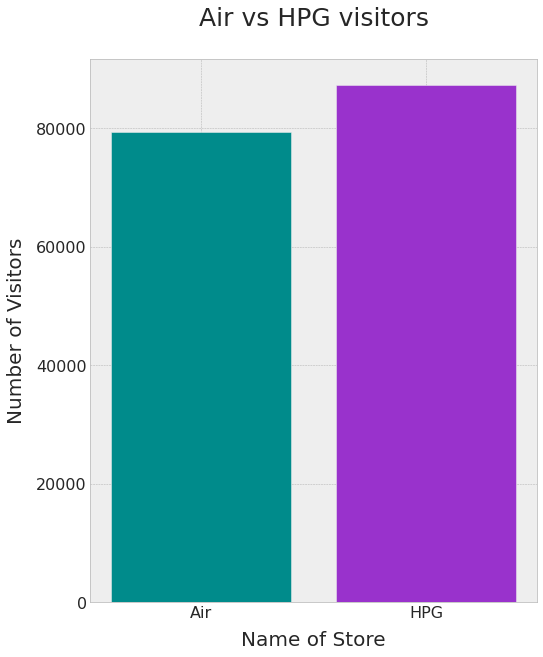

In [7]:
# plotting how many visits are generated from the air and hpg datasets

plt.style.use('bmh')
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (8,10))

x_axis = ["Air","HPG"]
height = [air_visitors, hpg_visitors]

axes.bar(x_axis, height, tick_label = x_axis, width = .8, color = ['darkcyan', 'darkorchid'], align = 'center') 
axes.set_title('Air vs HPG visitors', fontsize = 25,y = 1.05)
axes.set_xlabel("Name of Store", fontsize = 20 ,labelpad = 10)
axes.set_ylabel("Number of Visitors", fontsize = 20,labelpad = 10)

axes.tick_params(axis='x', labelsize = 16)
axes.tick_params(axis='y', labelsize = 16)

plt.show()